In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mel_scale(f0):
    """メル尺度"""
    
    m0 = 1000.0 / np.log10(1000.0 / f0 + 1.0)

    def mel_scaled(f):
        return m0 * np.log10(f / f0 + 1.0)

    return mel_scaled

def imel_scale(f0):
    """メル尺度の逆関数"""
    
    m0 = 1000.0 / np.log10(1000.0 / f0 + 1.0)
    
    def imel_scaled(m):
        return f0 * (10 ** (m / m0) - 1)
    
    return imel_scaled

In [3]:
def mel_check(hz):
    mel = mel_scale(700)(hz)
    x = imel_scale(700)(mel)
    print(hz, "to mel =>", mel)
    print(mel, "to hz =>", x)

In [4]:
mel_check(20000)

20000 to mel => 3816.9688369110513
3816.9688369110513 to hz => 20000.0


In [5]:
def plot_mel(f0):
    mel_scaled = mel_scale(f0)
    xs = np.arange(20000)
    mel_xs = np.vectorize(mel_scaled)(xs)
    plt.plot(xs, mel_xs)

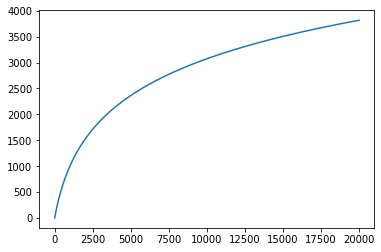

In [6]:
plot_mel(700)

In [25]:
def tri_window(n, l, m, r):
    a = np.zeros(int(l))
    b = np.arange(0, 1, 1/(m-l))
    c = np.arange(1, 0, -1/(r-m))
    d = np.zeros(int(n-r))
    
    f = np.concatenate([a, b, c, d])
    if len(f) == n:
        return f
    elif len(f) < n:
        return np.concatenate([f, [0]])
    else:
        return f[:-1]
        

def mel_filter_bank(f, n_bins, mel_param=700):
    mel_scaled = mel_scale(mel_param)
    imel_scaled = imel_scale(mel_param)

    mel_end = mel_scaled(f)

    mel_split = np.array_split(np.arange(int(mel_end)), n_bins+1)
    
    mel_split_r = [imel_scaled(b[-1])
                   for b
                   in mel_split[1:]]
    
    mel_split_m = [mel_split[0][-1]] + mel_split_r[:-1]
    
    mel_split_l = [0] + mel_split_m[:-1]
    
    return np.array([tri_window(f, l, m, r) 
                      for l, m, r 
                      in zip(mel_split_l, mel_split_m, mel_split_r)])
    

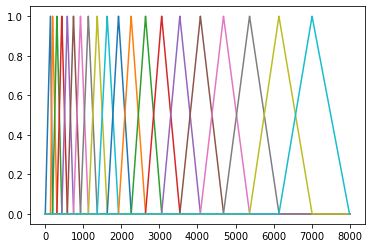

In [27]:
for i in mel_filter_bank(8000, 20):
    plt.plot(i)